In [ ]:
!pip install wandb

In [32]:
# Import

import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import wandb
from wandb.keras import WandbCallback


Generate data

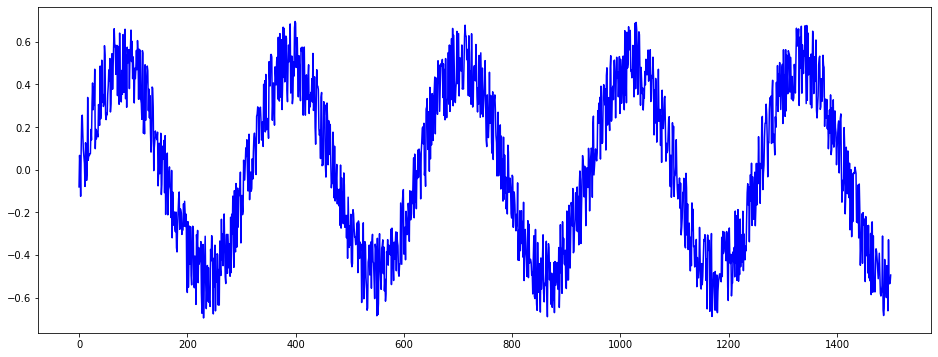

In [35]:
# Sine Signal

N = 1500
t = np.arange(0, N)

data_sine = np.sin(t * 0.02) / 2 + np.random.uniform(-0.2, 0.2, N)
plt.figure(figsize=(16, 6))
plt.plot(data_sine, 'b')
plt.show()

In [36]:
# Sampeling and Convert Signal to Dataset
# Step is Hyperparameter

def convertSignalToDataset(signal, step):
  X = []
  Y = []

  for i in range(len(signal) - step):
    
    j = i + step
    X.append(signal[i:j])
    Y.append(signal[j])

  return np.array(X), np.array(Y)

In [37]:
# Seperate Test and Train

step = 10

train = data_sine[:1000]
test = data_sine[1000:]

X_train, Y_train = convertSignalToDataset(train, step)
X_test, Y_test = convertSignalToDataset(test, step)

X_train.shape, X_test.shape

((990, 10), (490, 10))

In [38]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

X_train.shape, X_test.shape

((990, 10, 1), (490, 10, 1))

### Define Model, Fit and Compile

In [39]:
# Define Model

model = tf.keras.models.Sequential([
          layers.SimpleRNN(units=64, input_shape=(None, 1)),
          layers.Dense(1)
])

In [ ]:
# Wandb init

wandb.init(project='RNN Regression')

In [41]:
config = wandb.config
config.learning_rate = 0.001

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.MSE)

In [ ]:
model.fit(X_train, Y_train, epochs=100, batch_size=16, callbacks=[WandbCallback()])

### Evaluate and Predict

In [44]:
# Evaluate

model.evaluate(X_test, Y_test)

16/16 [==============================] - 0s 4ms/step - loss: 0.0158


0.015790507197380066

In [45]:
# Predict

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

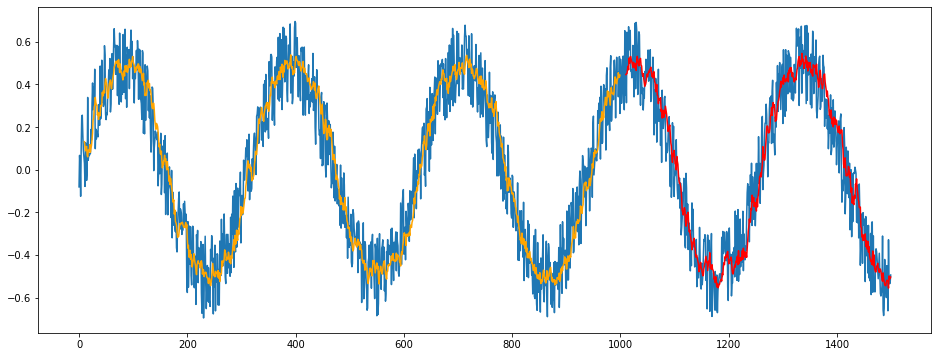

In [81]:
#Plot

plt.figure(figsize=(16, 6))
plt.plot(data_sine)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(data_sine)
trainPredictPlot[:] = np.nan
trainPredictPlot[step:len(train_predict)+step] = train_predict[:, 0]

# shift test predictions for plotting
testPredictPlot = np.empty_like(data_sine)
testPredictPlot[:] = np.nan
testPredictPlot[len(train_predict)+(step*2):len(data_sine)] = test_predict[:, 0]

plt.plot(trainPredictPlot, 'orange')
plt.plot(testPredictPlot, 'red')

plt.show()